# Seasonality

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

In [2]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/AirPassengers.csv'
df = pd.read_csv(URL)
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       398.401   0.000378364       90.3726   4.457e-06       0.001      123  LS failed, Hessian reset 
      93       398.516   0.000318384       86.6439   5.405e-06       0.001      205  LS failed, Hessian reset 
      99       398.529   4.48541e-05       82.4694      0.4269      0.4269      212   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       398.593   4.45915e-06       66.6257           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       398.596   2.71967e-05       74.2958   3.017e-07       0.001      413  LS failed, Hessian reset 
     270       398.597   3.55624e-09       56.3026      0.1641      0.1641      490   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

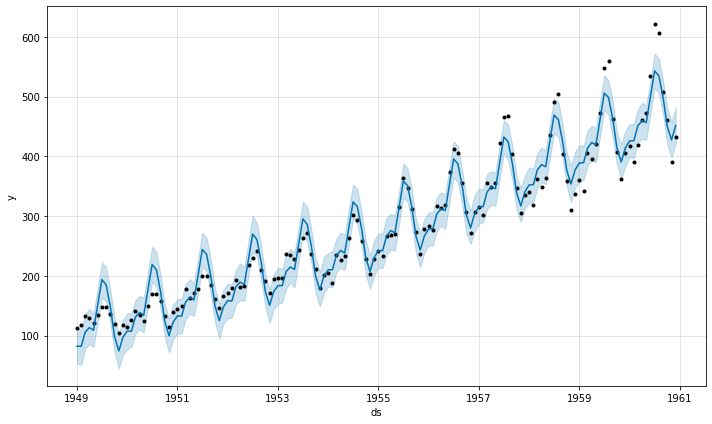

In [3]:
model_a = Prophet(seasonality_mode='additive', yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

By default, if no `seasonality_mode` is stated, then Prophet will automatically select `'additive'`.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       485.276   0.000333743       168.376   3.876e-06       0.001      158  LS failed, Hessian reset 
      99       485.325   7.70573e-05       53.0977       8.049      0.8049      181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       485.816   1.25966e-05       56.8143     1.7e-07       0.001      326  LS failed, Hessian reset 
     199       485.817   7.28494e-08       53.1172      0.1446      0.6424      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       485.817   2.27369e-07       53.8338   3.088e-09       0.001      412  LS failed, Hessian reset 
     213       485.817   1.17942e-08       44.2282     0.03507           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

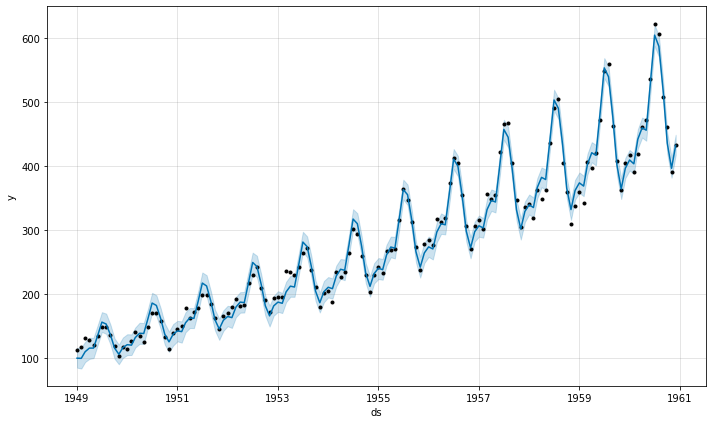

In [4]:
model_m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

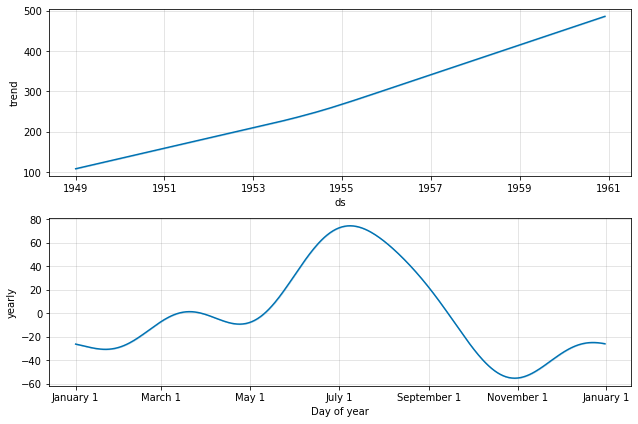

In [6]:
fig_a2 = model_a.plot_components(forecast_a)
plt.show()

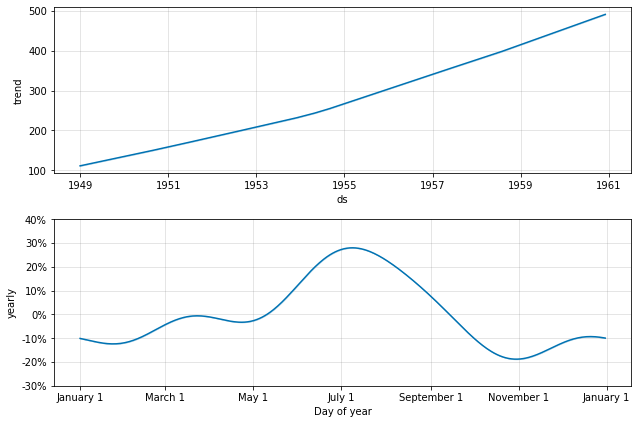

In [7]:
fig_m2 = model_m.plot_components(forecast_m)
plt.show()

In [8]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_daily.csv'
df = pd.read_csv(URL)
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


In [9]:
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2756.55   0.000861337       101.869      0.4001           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       2757.97    0.00023829       81.1851    1.73e-06       0.001      208  LS failed, Hessian reset 
     199        2758.5   5.28644e-05       80.6646           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       2758.53   2.92635e-07       58.2167      0.7184      0.7184      419   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


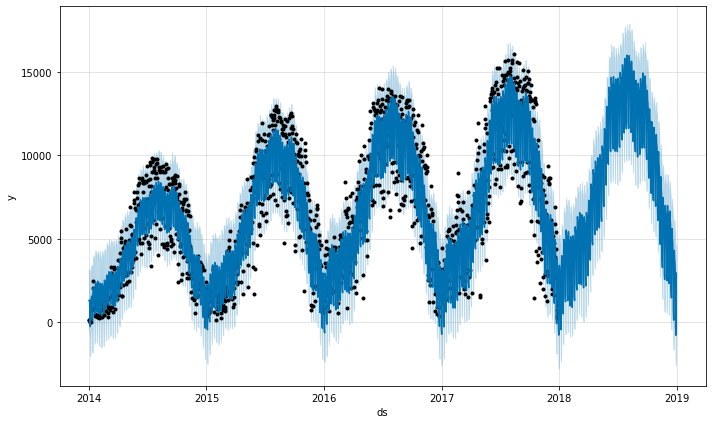

In [10]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

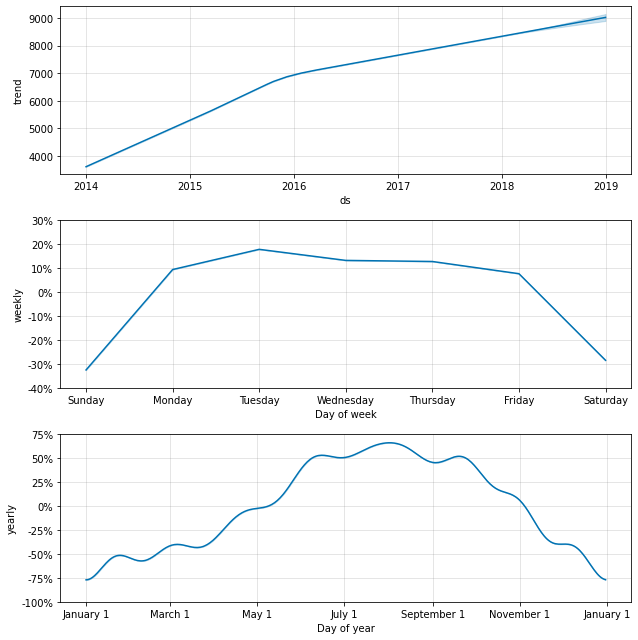

In [11]:
fig2 = model.plot_components(forecast)
plt.show()

# Adjust Fourier order

In [12]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       2713.43   0.000947721       208.954   1.023e-05       0.001      151  LS failed, Hessian reset 
      99       2714.49   0.000871608       65.5509      0.4647      0.4647      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       2715.54    0.00113776       271.667   1.057e-05       0.001      275  LS failed, Hessian reset 
     199       2716.32   2.23266e-07       77.7627      0.5169      0.5169      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       2716.32   2.38135e-06       85.0662   3.088e-08       0.001      403  LS failed, Hessian reset 
     222       2716.32   1.63079e-07        78.506      0.2943      0.9709      413   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


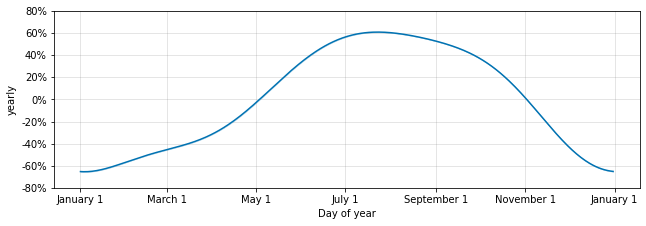

In [13]:
from prophet.plot import plot_yearly
fig3 = plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

# Adding conditional seasonalities

Adicionar informação de sazonalidade diaria diferente em dias de semana e em dias de final de semana

In [3]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_hourly.csv'
df = pd.read_csv(URL)
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [4]:
def is_weekend(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5 or date.dayofweek == 6)

In [5]:
df['weekend'] = df['ds'].apply(is_weekend)
df['weekday'] = ~df['ds'].apply(is_weekend)

In [6]:
df.head()

,ds,y,weekend,weekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True


In [7]:
model = Prophet(
    seasonality_mode='multiplicative', 
    yearly_seasonality=6, 
    weekly_seasonality=6, 
    daily_seasonality=False
)

In [8]:
model.add_seasonality(
    name='daily_weekend', 
    period=1, 
    fourier_order=3, 
    condition_name='weekend'
)

In [9]:
model.add_seasonality(
    name='daily_weekday', 
    period=1, 
    fourier_order=3, 
    condition_name='weekday'
)

In [10]:
model.fit(df)

Initial log joint probability = -677.584
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       70313.8    0.00830146       2165.88           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         71570    0.00662511       3479.79      0.3328      0.3328      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       71804.9    0.00527321       3695.37           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       71886.5     0.0115532       913.263          10           1      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       72032.7     0.0244324       1176.95           1           1      628   
    Iter      log prob        ||dx||      ||grad||       alpha  

35.119           1           1     2050   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       72290.2    0.00472435       194.631           1           1     2182   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       72291.1   0.000447612       157.915           1           1     2301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999         72292   0.000488564       164.498           1           1     2423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2034       72292.1    0.00016382       58.8011           1           1     2465   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [11]:
future = model.make_future_dataframe(periods=365 * 24, freq='h')
future['weekend'] = future['ds'].apply(is_weekend)
future['weekday'] = ~future['ds'].apply(is_weekend)
forecast = model.predict(future)

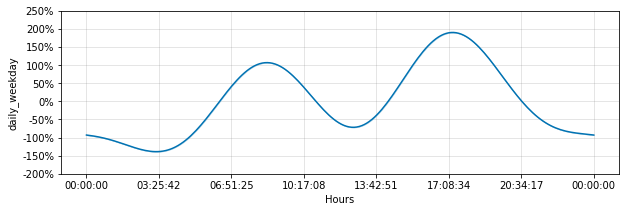

In [12]:
from prophet.plot import plot_seasonality

fig3 = plot_seasonality(model, 'daily_weekday', figsize=(10, 3))
plt.show()

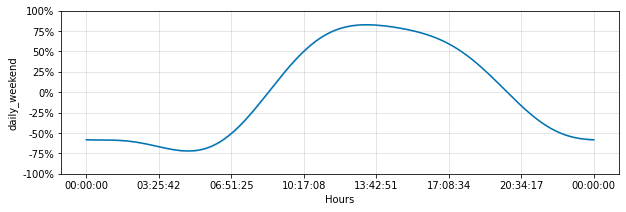

In [13]:
fig4 = plot_seasonality(model, 'daily_weekend', figsize=(10, 3))
plt.show()

# Regularizing seasonality

The full Prophet package has several adjustable parameters for regularization. For 
seasonality, that parameter is called the prior scale.


In statistics, you may have an uncertain quantity that you intend to find the value of. 
The **prior probability distribution**, often just called a prior, of that quantity is the 
probability distribution of values you would expect *prior* to learning some bit of additional 
information. 


For example, let's say I ask you to guess the height of a specific human male. In your mind, 
you imagine all the likely heights of males. That range of heights is the prior probability 
distribution. Next, I tell you that the male is an NBA basketball player. You know 
basketball players are typically much taller than the average male, so you update that 
distribution to skew more toward tall heights because the additional information 
I provided you with better informs your guess. 


The prior is your starting point, what you believe to be true before receiving additional 
information. 

## Global seasonality regularization

he first way to apply seasonality regularization is globally, affecting all seasonalities 
in your model equally.

`seasonality_prior_scale` is an attribute of your Prophet 
model instance and is set when you instantiate your model. 

If you do not set it, the default will be **10**. 

Reducing this number will apply more regularization, which will rein in your 
model's seasonalities.

In [21]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_daily.csv'
df = pd.read_csv(URL)
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [22]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    seasonality_prior_scale=.01
)

In [23]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1652.24    0.00111498        81.746           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       1652.44   0.000209137       69.6021   2.396e-06       0.001      203  LS failed, Hessian reset 
     171       1652.45     2.587e-08       84.2378       0.179       0.179      260   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


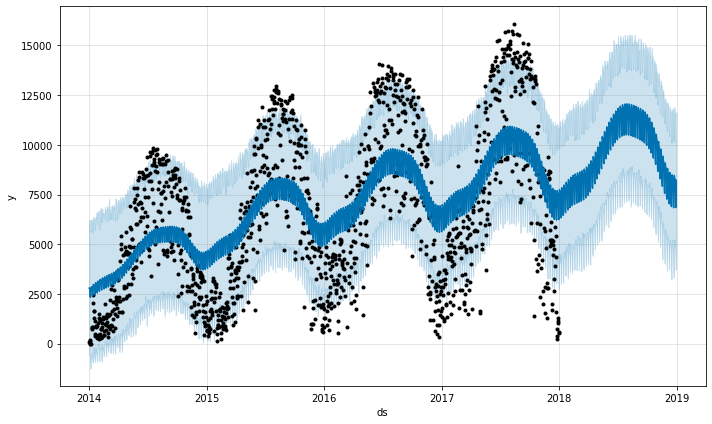

In [24]:
fig = model.plot(forecast)
plt.show()

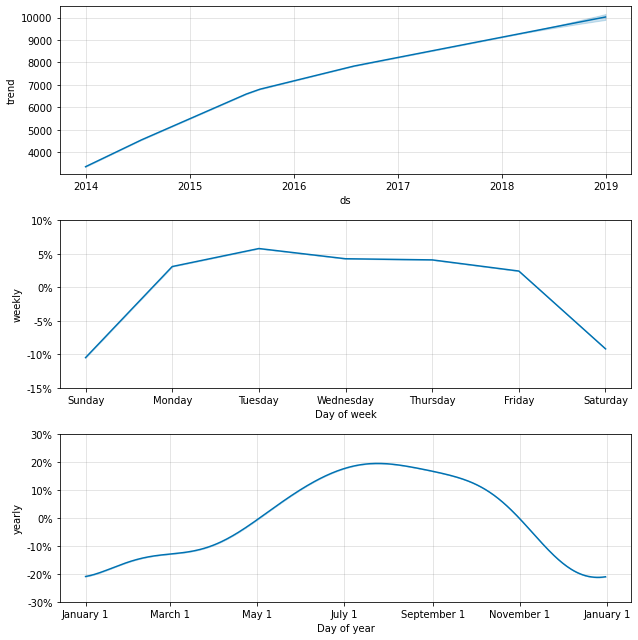

In [25]:
fig2 = model.plot_components(forecast)
plt.show()

## Local seasonality regularization

In [26]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    weekly_seasonality=False
)

In [27]:
model.add_seasonality(
    name='weekly',
    period=7,
    fourier_order=4,
    prior_scale=0.01
)

In [28]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2500.61    0.00483632       180.092           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       2501.21    0.00033491       80.0545   1.928e-06       0.001      216  LS failed, Hessian reset 
     170       2501.66     0.0004358       82.4197   4.303e-06       0.001      310  LS failed, Hessian reset 
     199       2501.69   1.61433e-06       86.3846       0.314           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       2501.73   8.29628e-05       71.6078   1.194e-06       0.001      471  LS failed, Hessian reset 
     299       2501.74   1.56247e-05       73.0201     0.06336           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       2501.74   1.06717e-05  

In [29]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

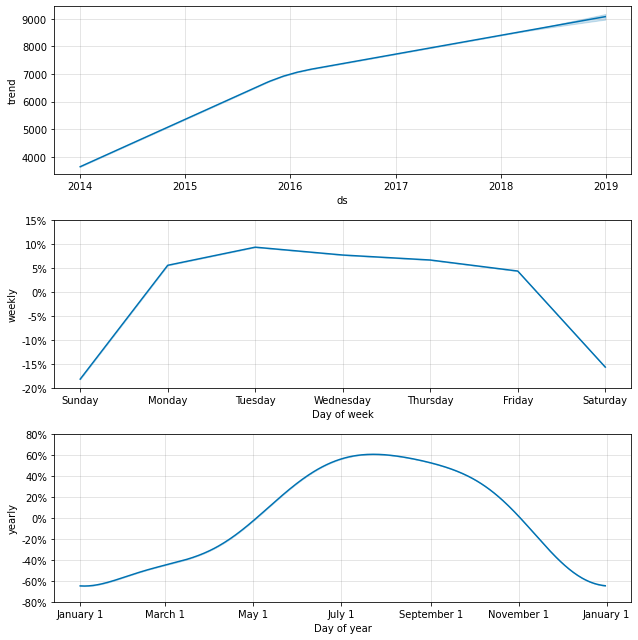

In [30]:
fig2 = model.plot_components(forecast)
plt.show()